In [3]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

from pytz        import timezone
from datetime    import datetime, timedelta

In [ ]:
# * * *   Date Strings   * * *
YESTERDAY             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(1)  , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
PREVIOUS_BUSINESS_DAY = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(3)  , "%Y%m%d") if datetime.now(timezone('Asia/Seoul')).weekday() == 0 else YESTERDAY # Previous Business Day (Format:"YYYYMMDD")
TODAY                 = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
TOMORROW              = datetime.strftime(datetime.now(timezone('Asia/Seoul')) + timedelta(1)  , "%Y%m%d") # Yesterday (Format:"YYYYMMDD")
LAST_YEAR             = datetime.strftime(datetime.now(timezone('Asia/Seoul')) - timedelta(365), "%Y")     # Last year (Format:"YYYY")
CURRENT_YEAR          = datetime.strftime(datetime.now(timezone('Asia/Seoul'))                 , "%Y")     # This year (Format:"YYYY")

# Tickers of World Indexes
WORLD_INDEX_TICKERS = [ {'ticker':'^GSPC',     'nation':'US',          'name':'S&P 500'},
                        {'ticker':'^DJI',      'nation':'US',          'name':'Dow Jones Industrial Average'},
                        {'ticker':'^IXIC',     'nation':'US',          'name':'NASDAQ Composite'},
                        {'ticker':'^NYA',      'nation':'US',          'name':'NYSE COMPOSITE (DJ)'},
                        {'ticker':'^XAX',      'nation':'US',          'name':'NYSE AMEX COMPOSITE INDEX'},
                        {'ticker':'^BUK100P',  'nation':'UK',          'name':'Cboe UK 100'},
                        {'ticker':'^RUT',      'nation':'US',          'name':'Russell 2000'},
                        {'ticker':'^VIX',      'nation':'US',          'name':'Vix'},
                        {'ticker':'\^FTSE',    'nation':'UK',          'name':'FTSE 100'},
                        {'ticker':'^GDAXI',    'nation':'Germany',     'name':'DAX PERFORMANCE-INDEX'},
                        {'ticker':'^FCHI',     'nation':'France',      'name':'CAC 40'},
                        {'ticker':'^STOXX50E', 'nation':'Europe',      'name':'ESTX 50 PR.EUR'},
                        {'ticker':'^N100',     'nation':'France',      'name':'Euronext 100 Index'},
                        {'ticker':'^BFX',      'nation':'Belgium',     'name':'BEL 20'},
                        {'ticker':'IMOEX.ME',  'nation':'Russia',      'name':'MOEX Russia Index'},
                        {'ticker':'^N225',     'nation':'Japan',       'name':'Nikkei 225'},
                        {'ticker':'^HSI',      'nation':'Taiwan',      'name':'HANG SENG INDEX'},
                        {'ticker':'000001.SS', 'nation':'China',       'name':'SSE Composite Index'},
                        {'ticker':'399001.SZ', 'nation':'China',       'name':'Shenzhen Index'},
                        {'ticker':'\^STI',     'nation':'Singapore',   'name':'STI Index'},
                        {'ticker':'^AXJO',     'nation':'Australia',   'name':'S&P/ASX 200'},
                        {'ticker':'^AORD',     'nation':'Australia',   'name':'ALL ORDINARIES'},
                        {'ticker':'^BSESN',    'nation':'India',       'name':'S&P BSE SENSEX'},
                        {'ticker':'^JKSE',     'nation':'Indonesia',   'name':'Jakarta Composite Index'},
                        {'ticker':'\^KLSE',    'nation':'Malaysia',    'name':'FTSE Bursa Malaysia KLCI'},
                        {'ticker':'^NZ50',     'nation':'New Zealand', 'name':'S&P/NZX 50 INDEX GROSS'},
                        {'ticker':'^KS11',     'nation':'Korea',       'name':'KOSPI Composite Index'},
                        {'ticker':'^TWII',     'nation':'Taiwan',      'name':'TSEC weighted index'},
                        {'ticker':'^GSPTSE',   'nation':'Canada',      'name':'S&P/TSX Composite index'},
                        {'ticker':'^BVSP',     'nation':'Brazil',      'name':'IBOVESPA'},
                        {'ticker':'^MXX',      'nation':'Mexico',      'name':'IPC MEXICO'},
                        {'ticker':'^IPSA',     'nation':'Chile',       'name':'S&P/CLX IPSA'},
                        {'ticker':'^MERV',     'nation':'Argentina',   'name':'MERVAL'},
                        {'ticker':'^TA125.TA', 'nation':'Israel',      'name':'TA-125'},
                        {'ticker':'^CASE30',   'nation':'Egypt',       'name':'EGX 30 Price Return Index'},
                        {'ticker':'^JN0U.JO',  'nation':'Republic of South Africa', 'name':'Top 40 USD Net TRI Index'},
]

In [ ]:
def get_world_index(ticker:str, startDt:str="20000101", endDt:str=YESTERDAY):
    """
    세계 주요 주가 지수의 일별 OHCLV(Open, High, Close, Low, Volume) 데이터를 담은 DataFrame을 반환한다.
    
    [Parameters]
    ticker  (str) : 조회할 지수의 Ticker
    startDt (str) : 조회할 데이터의 시작 일자 (YYYYMMDD) (Default: "20000101")
    endDt   (str) : 조회할 데이터의 종료 일자 (YYYYMMDD) (Default: 전일)
    
    [Returns]
    pandas.core.frame.DataFrame : 세계 주요 주가 지수의 일별 OHCLV 데이터를 담은 DataFrame
    """
    
    startDt_datetime = datetime.strptime(startDt, '%Y%m%d')
    endDt_datetime   = datetime.strptime(endDt,   '%Y%m%d')
    
    try:
        return pdr.DataReader(ticker, 'yahoo', startDt_datetime, endDt_datetime)
    except:
        print(f"Fail: Invalid index name {ticker}")

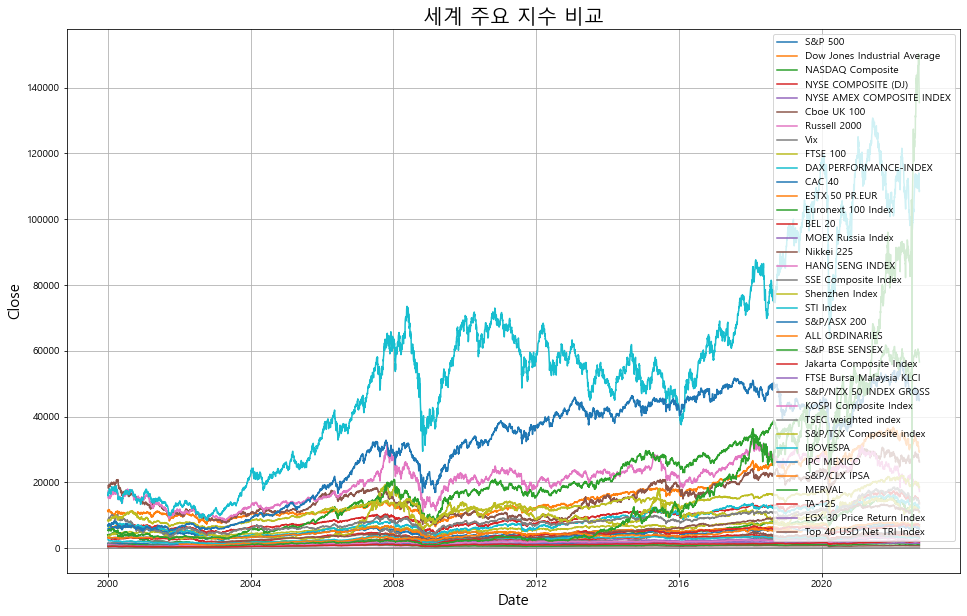

In [4]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
# plt.rcParams['axes.unicode_minus'] = False # 마이너스 깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

for index in WORLD_INDEX_TICKERS:
    ax1 = sns.lineplot(
        data=get_world_index(index['ticker']),
        x = 'Date',
        y = 'Close',
        label = index['name']
    )
    

plt.title('세계 주요 지수 비교', fontsize=20)
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()